# Exercise 2: Linear Models + Regularization
## 1. Estimate an Elastic Net model
In this exercise we estimate elastic net models with $\alpha \in \{0.25,0.5,0.75\}$.

Use CV (`cv.glmnet`) to choose the $\lambda$ minimizing the CV test error for each $\alpha$.
Calculate and show the minimal test error for each $\alpha$.

The following code will get you started:

In [1]:
library(mlbench)
library(glmnet)
library(caret)
data(BostonHousing)
trainIndex <- createDataPartition(BostonHousing$medv,p=0.5,list=FALSE)
training.data <- BostonHousing[trainIndex,]
test.data <- BostonHousing[-trainIndex,]
x <- model.matrix(medv~.,data=training.data)[,-1]
y <- training.data$medv

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

Loading required package: lattice
Loading required package: ggplot2


### Solutions:

In [2]:
cv.glmnet <- list()
times <- 1
alpha.grid <- c(0,0.25,0.5,0.75,1)
cv.errors <- numeric(length(alpha.grid))
optimal.lambda <- numeric(length(alpha.grid))

for(i in seq_along(alpha.grid)) {
    cv.error <- numeric(times)
    for(j in 1:times) {
        cv.fit <- cv.glmnet(x,y,alpha=alpha.grid[i])
        optimal.lambda[i] <- cv.fit$lambda.min
        lambda.idx <- which(cv.fit$lambda == cv.fit$lambda.min)
        cv.error[j] <- cv.fit$cvm[lambda.idx]
    }
    cv.errors[i] <-mean(cv.error) 
    print(paste0("alpha=",alpha.grid[i],": error=",cv.errors[i]))
}

[1] "alpha=0: error=20.4522600646215"
[1] "alpha=0.25: error=21.9249420184762"
[1] "alpha=0.5: error=21.5961382581917"
[1] "alpha=0.75: error=21.3192484893989"
[1] "alpha=1: error=20.7400129688197"


## 2. Compare the optimal ElasticNet model to OLS using our hold-out sample (test.data)
Which is doing better? OLS or Elastic NET?

Hint: recall that we got the OLS fit like this:

In [3]:
ols.fit <- lm(medv~.,data=training.data)

### Solutions:

In [4]:
#optimal model:
alpha <- 0.75
cv.fit <- cv.glmnet(x,y,alpha=alpha)
newx <- model.matrix(medv~.,data=test.data)[,-1]
print(mean((predict(cv.fit,s=cv.fit$lambda.min,newx=newx)-test.data$medv)^2))
print(mean((test.data$medv - predict(ols.fit,newdata=test.data))^2))

[1] 27.12424
[1] 26.82107


## 3. True Power of Regularization
The improvement in the test error from using Elastic NET was quite minimal before.
The reason is that the models were actually not that complex, and most variables add enough predictive information to warrant them being included.
OLS did not overfit a lot.

Next, we are going to construct a more complex linear model. Let us add all interaction terms to our model. In R that's as easy as this:

In [5]:
frm <- medv ~ (age + b + chas + crim + dis + indus + lstat + nox + ptratio + rad + rm + tax + zn)^2

**a.** Fit an unregularized OLS model for the `frm` formula. What is the average test error on `test.data`?

In [6]:
ols.fit <- lm(frm,data=training.data)
print(mean((test.data$medv-predict(ols.fit,newdata=test.data))^2))

[1] 18.31312


**b.** Now fit an Elastic Net model for `frm` with $\alpha=0.5$. Compare the minimal test error with OLS and the previous model.

In [7]:
alpha <- 0.5
x <- model.matrix(frm,data=training.data)[,-1]
newx <- model.matrix(frm,data=test.data)[,-1]

cv.fit <- cv.glmnet(x,y,alpha=alpha)
print(mean((predict(cv.fit,s=cv.fit$lambda.min,newx=newx)-test.data$medv)^2))

[1] 15.73878


**c.** Plot the test error as a function of $\lambda$. How many variables are included at the optimal $\lambda$? How many are discarded?

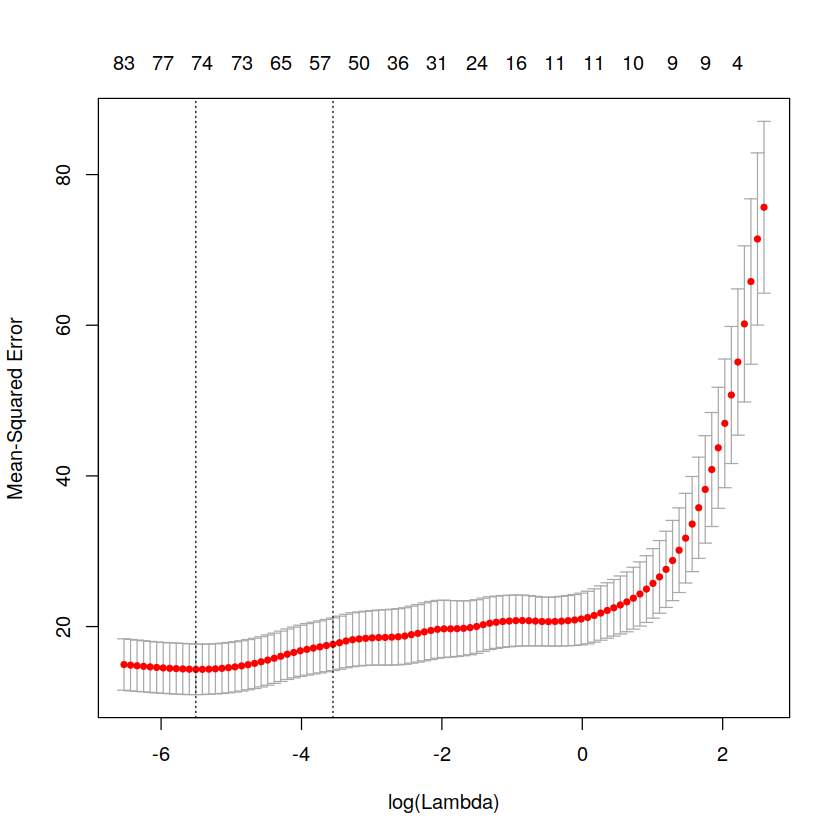

In [8]:
plot(cv.fit)